<a href="https://colab.research.google.com/github/s2cretjuju/first-repository/blob/master/ds6/20251030_%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [212]:
!pip install kagglehub

In [213]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [214]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [216]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [217]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# **1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.**

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [218]:
# TotalPrice가 0 이하인 값 제거
df_clean = df[df["TotalPrice"] > 0].copy()

In [219]:
# 모집단의 TotalPrice 통계량 계산
pop_mean = df_clean['TotalPrice'].mean()
pop_std = df_clean['TotalPrice'].std()
pop_size = len(df_clean)

In [220]:
# 표본 1000개 무작위 추출
sample_df = df_clean.sample(n=1000, random_state=42, replace = False)

In [221]:
# 표본집단의 TotalPrice 통계량 계산
sample_mean = sample_df['TotalPrice'].mean()
sample_std = sample_df['TotalPrice'].std()
sample_size = len(sample_df)

In [222]:
# 결과 출력
print(f'--- 모집단 정보 (Total Price > 0) ---')
print(f'모집단 크기: {pop_size}')
print(f'모집단 평균(μ): {pop_mean: .4f}')
print(f'모집단 표준편차(σ): {pop_std: .4f}')

print(f'\n--- 표본집단 정보 (n = {sample_size}) ---')
print(f'표본 평균(x̄): {sample_mean: .4f}')
print(f'표본 표준편차(s): {sample_std: .4f}')

--- 모집단 정보 (Total Price > 0) ---
모집단 크기: 530104
모집단 평균(μ):  20.1219
모집단 표준편차(σ):  270.3567

--- 표본집단 정보 (n = 1000) ---
표본 평균(x̄):  19.9782
표본 표준편차(s):  54.4886


**1. 모평균과 표본평균의 차이(μ vs x̄)**

* 표본 오차 (sampling error): 모평균(20.1219)과 표본평균(19.9782) 사이의 차이는 약 0.14로 매우 작음. 이는 표본 추출 과정에서 발생하는 표본 오차
* 중심극한정리에 따르면, 표본의 크기 (n =1000)가 충분히 크기 때문에, 추출된 표본 평균(x̄)은 모집단 평균(μ)의 좋은 추정치가 될 수 있음. (모평균을 중심으로 한 정규분포를 따를 것임)

**2. 표준편차의 차이 (σ vs s)**

* 모집단 표준편차(270.3567)는 표본 표준편차(54.4886)에 비해 매우 큼
* 모집단은 극단적인 이상치들을 모두 포함하지만, 무작위로 추출된 1000개의 표본은 극소수의 이상치만을 포함하거나 포함하지 않을 확률이 높기 때문에 표본의 산포도(s)가 모집단의 산포도(σ)보다 훨씬 작게 나타남

In [223]:
# 독립표본 t-검정 시행
# 모집단과 표본의 TotalPrice 비교
# Welch's t-test (equal_var=False) 사용
t_statistic, p_value = stats.ttest_ind(df_clean['TotalPrice'], sample_df['TotalPrice'], equal_var=False)

# 6. t-검정 결과 출력
print("\n--- 독립표본 t-검정 결과 ---")
print(f"T-통계량: {t_statistic:.4f}")
print(f"P-값: {p_value:.4f}")


--- 독립표본 t-검정 결과 ---
T-통계량: 0.0815
P-값: 0.9350


**1. 가설**

* 귀무가설 (H0): 표본 평균(x̄)과 모평균(μ)은 통계적으로 차이가 없다
* 대립가설 (H1): 표본 평균(x̄)과 모평균(μ)은 통계적으로 차이가 있다

**2. 통계적 결론**

* p-value: 계산된 p-value(0.9350)이 유의수준 α(0.05)보다 훨씬 크므로, 귀무가설을 기각할 수 없음
* t-통계량: t-통계량이 0.0815로 0에 매우 가까우므로, 두 평균의 차이가 미미하다고 볼 수 있음

**3. 최종 결론**

* 무작위로 추출된 1000개의 표본의 평균은 모집단의 평균과 통계적으로 유의미한 차이가 없음
* 이는 추출된 표본이 모집단의 특성을 잘 대표하고 있으며, 두 평균의 작은 차이(표본 오차)는 추출 과정에 발생한 것임을 알 수 있음
* 이 결과는 충분히 큰 표본의 크기가 모수를 잘 추정하고 있음을 보여줌

# **2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.**

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [224]:
# 1. 주문 상위 두 국가 선정 및 데이터 준비

# Country별 주문 수를 세어 상위 2개 국가 확인
top_2_countries = df_clean['Country'].value_counts().nlargest(2).index.tolist()
country_A = top_2_countries[0]
country_B = top_2_countries[1]

print(f'주문이 가장 많은 상위 2개 국가: {country_A}와 {country_B}')

주문이 가장 많은 상위 2개 국가: United Kingdom와 Germany


In [225]:
# 상위 두 국가의 데이터만 추출
df_A = df_clean[df_clean['Country'] == country_A]['TotalPrice']
df_B = df_clean[df_clean['Country'] == country_B]['TotalPrice']

In [226]:
# 각 국가의 기본 통계량
mean_A = df_A.mean()
mean_B = df_B.mean()
std_A = df_A.std()
std_B = df_B.std()

print(f"\n--- {country_A} ({len(df_A):,}건) ---")
print(f"평균 TotalPrice: {mean_A:.4f}")
print(f"표준편차: {std_A:.4f}")

print(f"\n--- {country_B} ({len(df_B):,}건) ---")
print(f"평균 TotalPrice: {mean_B:.4f}")
print(f"표준편차: {std_B:.4f}")


--- United Kingdom (485,123건) ---
평균 TotalPrice: 18.6040
표준편차: 281.2802

--- Germany (9,040건) ---
평균 TotalPrice: 25.3172
표준편차: 35.4627


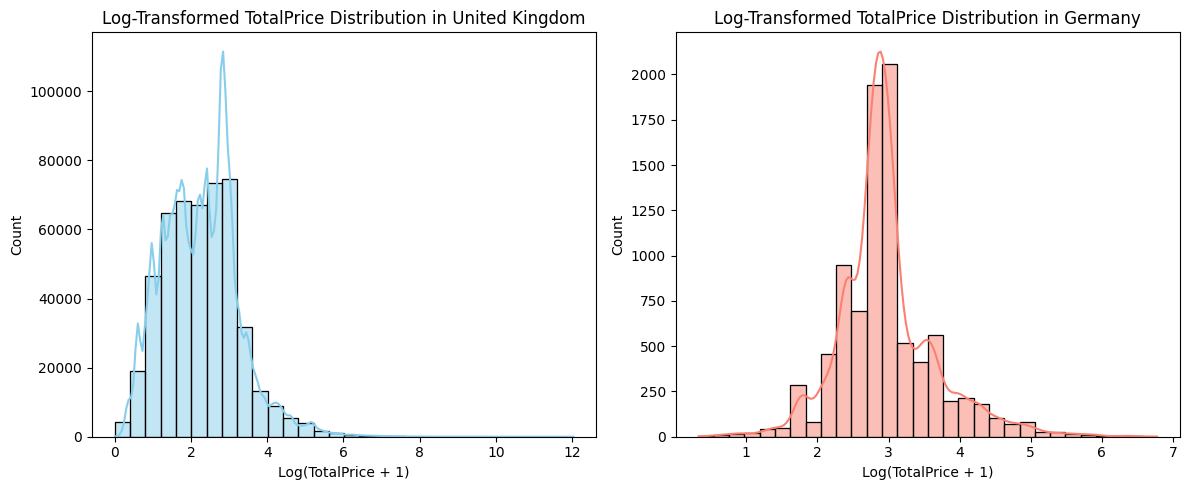

In [227]:
# 2. 데이터 분포 시각화 및 설명

# TotalPrice에 1을 더해 로그 변환 (0 또는 음수 방지)
df_A_log = np.log1p(df_A)
df_B_log = np.log1p(df_B)

plt.figure(figsize=(12, 5))

# Country A의 분포
plt.subplot(1, 2, 1)
sns.histplot(df_A_log, kde=True, bins=30, color='skyblue')
plt.title(f'Log-Transformed TotalPrice Distribution in {country_A}')
plt.xlabel('Log(TotalPrice + 1)')

# Country B의 분포
plt.subplot(1, 2, 2)
sns.histplot(df_B_log, kde=True, bins=30, color='salmon')
plt.title(f'Log-Transformed TotalPrice Distribution in {country_B}')
plt.xlabel('Log(TotalPrice + 1)')

plt.tight_layout()
plt.show()

* 분포 형태: log 변환을 적용한 후에도 두 국가 모두 여전히 약간의 오른쪽 꼬리를 가지지만, 원래의 심하게 왜곡된 분포보다는 정규분포에 훨씬 가까운 종 모양
* 평균 위치: UK의 평균 거래액(18.60)은 Germany의 평균 거래액(25.32)보다 확연히 낮은 위치에 분포의 중심히 형성됨
* 표준편차: UK의 표준편차(281.28)는 Germany의 표준편차(35.46)에 비해 극단적으로 큼. 이는 UK 데이터에는 매우 크고 빈번한 이상치가 포함되어 있음을 의미

In [228]:
# 3. 독립표본 t-검정 시행 및 결과 해석

# 독립표본 t-검정 시행
# 두 국가의 분산이 크게 다르므로 (표준편차 값 확인), Welch's t-test 사용
t_statistic, p_value = stats.ttest_ind(df_A, df_B, equal_var = False)

print('--- 독립표본 t-검정 결과 ---')
print(f't-통계량: {t_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

--- 독립표본 t-검정 결과 ---
t-통계량: -12.2117
p-value: 0.0000


**1. 가설**
* 귀무가설 (H0): 두 국가의 평균 'TotalPrice'는 차이가 없다
* 대립가설 (H1): 두 국가의 평균 'TotalPrice'는 차이가 있다

**2. t-통계량 (-12.2117)**
* t-통계량 값이 0에서 매우 멀리 떨어진 큰 절대값을 가짐
* 이는 귀무가설 (H0)하에서 이 정도의 평균 차이 (18.60 vs 25.32)가 우연히 발생할 확률이 매우 낮다는 것을 의미

**3. p-value (0.0000)**
* p-value가 유의수준보다 작으므로, 귀무가설 (H0)을 기각하고 대립가설 (H1)을 채택
* UK의 평균 'TotalPrice'(18.60)와 Germany의 평균 'TotalPrice'(25.32) 사이에는 유의미한 차이가 존재

**1. 1종 오류 (Type I Error, α 오류)**
* 귀무가설이 참인데, 귀무가설을 기각하는 경우
* 실제로는 UK와 Germany의 평균 거래액이 같거나 비슷하지만, p-value = 0.0000이라는 결과가 나와 차이가 있다고 잘못 주장하는 것
* 이 오류를 범할 확률은 유의수준 α = 0.05와 같음. 하지만 p-value 값이 0.0000으로 매우 작기 때문에, 1종 오류를 범할 위험도는 아주 낮음

**2. 2종 오류 (Type I Error, β 오류)**
* 대립가설이 참인데, 귀무가설 채택하는 경우
* 실제로는 UK와 Germany의 평균 거래액에 차이가 있지만, t-검정 결과 우연히 p-value가 크게 나와 차이가 없다고 잘못 주장하는 것
* 최종적으로 H0를 기각하고 H1을 채택하였으므로, 2종으류는 발생하지 않았음

# **3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.**

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [229]:
# 1. 주중/주말 데이터 분리 및 기술 통계량 계산

# 'DayOfWeek'를 사용하여 주중(0-4)과 주말(5-6) 데이터 분리
# 주중: 0 (월) ~ 4 (금)
# 주말: 5 (토), 6 (일)
df_weekday = df_clean[df_clean['DayOfWeek'].isin(range(5))]['UnitPrice']
df_weekend = df_clean[df_clean['DayOfWeek'].isin([5, 6])]['UnitPrice']

# 기술 통계량 계산 함수
def describe_unitprice(data, label):
    desc = data.describe()
    print(f"--- {label} UnitPrice 기술 통계량 ---")
    print(f"평균 (Mean): {desc['mean']:.4f}")
    print(f"중간값 (Median): {desc['50%']:.4f}")
    print(f"표준편차 (Std Dev): {desc['std']:.4f}")
    print(f"분산 (Variance): {desc['std']**2:.4f}")
    print(f"1사분위수 (Q1, 25%): {desc['25%']:.4f}")
    print(f"3사분위수 (Q3, 75%): {desc['75%']:.4f}")

describe_unitprice(df_weekday, "주중 (Weekday)")
describe_unitprice(df_weekend, "주말 (Weekend)")

--- 주중 (Weekday) UnitPrice 기술 통계량 ---
평균 (Mean): 4.0508
중간값 (Median): 2.1000
표준편차 (Std Dev): 38.1885
분산 (Variance): 1458.3635
1사분위수 (Q1, 25%): 1.2500
3사분위수 (Q3, 75%): 4.1300
--- 주말 (Weekend) UnitPrice 기술 통계량 ---
평균 (Mean): 2.8629
중간값 (Median): 1.7900
표준편차 (Std Dev): 7.7453
분산 (Variance): 59.9896
1사분위수 (Q1, 25%): 1.2500
3사분위수 (Q3, 75%): 3.7500


## **분포 설명**

**1. 중심 경향치**
* 주중의 평균(4.05)과 중간값(2.10)이 주말(2.86, 1.79)보다 약간 높음
* 이는 주중에 더 고가이거나 대량의 거래가 발생할 가능성이 높음을 추측 가능
* 하지만 평균과 중간값의 차이(주중: 1.95 / 주말: 1.07)를 볼 때, 두 분포 모두 오른쪽으로 심하게 치우쳐 있음(mean > median)을 알 수 있음

**2. 변산성**
* 주중의 표준편차(38.19)와 분산(1458.36)이 주말에 비해 압도적으로 큼
* 주중 데이터에 극단적으로 높은 UnitPrice를 가진 이상치가 주말보다 훨씬 많이 포함되어 이썽 분포의 변동성을 크게 확장시키고 있음

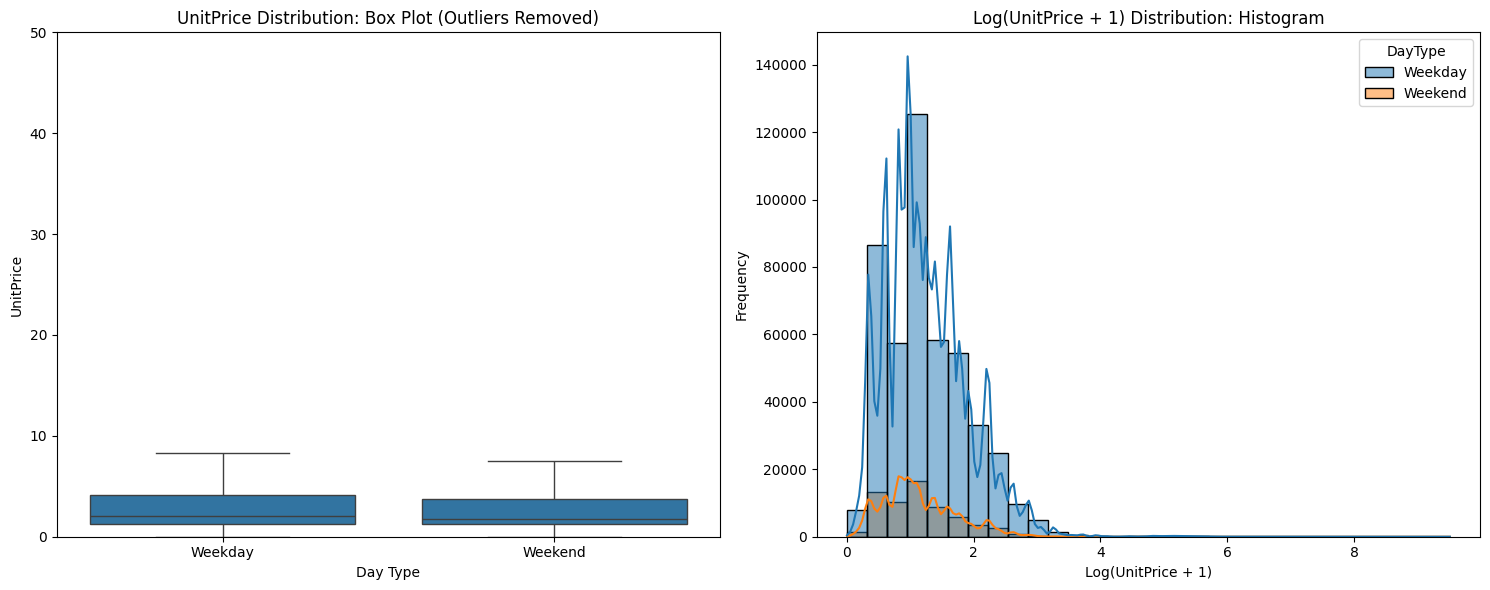

In [230]:
# 2. 시각화를 통한 분포 확인

# 비교를 위해 데이터를 하나의 DataFrame으로 통합
df_viz = df_clean.copy()
df_viz['DayType'] = df_viz['DayOfWeek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

plt.figure(figsize = (15,6))

# Boxplot
plt.subplot(1, 2, 1)
# y축 범위를 0-50으로 제한하여 대부분의 데이터가 분포하는 영역 확인 (매우 큰 이상치 제외)
sns.boxplot(x = 'DayType', y = 'UnitPrice', data = df_viz, showfliers = False)
plt.title('UnitPrice Distribution: Box Plot (Outliers Removed)')
plt.ylim(0, 50) # y-limit 설정으로 주요 분포 영역 확대
plt.xlabel('Day Type')
plt.ylabel('UnitPrice')

# 히스토그램
plt.subplot(1, 2, 2)
# 로그 변환된 UnitPrice 분포 시각화 (왜도 감소)
sns.histplot(data = df_viz, x = np.log1p(df_viz['UnitPrice']), hue = 'DayType', kde = True, bins = 30)
plt.title('Log(UnitPrice + 1) Distribution: Histogram')
plt.xlabel('Log(UnitPrice + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **시각화를 통한 분포 설명**

**1. Box plot**
* 중앙값 및 IQR: 상자 그림에서 주중과 주말의 중앙선(중앙값) 및 상자의 크기(IQR)가 거의 유사. 이는 대부분의 거래가 집중되는 낮은 가격대에서는 주중과 주말의 가격 분포에 큰 차이가 없음을 의미
* 이상치 처리: 그림의 y축 범위가 0-50으로 제한되어 있어, 수백/수천 단위의 극단저긴 이상치는 제외됨. 기술 통계량에서 확인된 주중의 거대한 표준편차는 이 상자 그림의 제한된 범위 밖에 위치하는 초고가 이상치들에 의해 발생함을 보여줌

**2. 로그 변환 히스토그램**
* 원래 분포의 왜도: 로그 변환을 적용하지 않은 원래의UnitPrice 데이터는 대부분의 값이 0에 가까이 몰려있고, 극소수의 이상치가 분포를 심하게 오른쪽으로 끌어당기는 극단적인 비대칭 분포를 가짐
* 로그 분포의 형태: 로그 변환을 통해 왜도를 감소시켰지만, 여전히 분포는 종 모양 보다는 오른쪽으로 치우친 형태를 보임
* 주중 vs 주말: 주중과 주말의 분포 형태와 중심 위치가 전반적으로 겹침. 주중의 거래 건수가 주말보다 훨씬 많기 때문에 주중 분포의 봉우리가 더 높게 나타나지만, UnitPrice가 주로 형성되는 구간은 두 요일 그룹에서 유사하게 나타남

## **결론**

**1. 가격 중심은 유사**
* 대부분의 거래가 발생하는 낮은 가격대(Q1-Q3)에서는 주중과 주말의 가격 분포는 큰 차이 없음

**2. 변동성 차이**
* 주중에는 극단적으로 높은 UnitPrice를 가진 이상치가 주말에 비해 훨씬 많아 압도적으로 큰 변산성을 가짐. 이는 주말에는 고가 또는 특이 거래가 주중에 비해 상대적으로 적다는 것을 의미

# **4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.**
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [231]:
# 1. 데이터 전처리 및 이진 종속 변수 생성
# 필요한 데이터프레임 복사
df_reg = df_clean.copy()

# 이상치 제거 (Quantity와 UnitPrice의 상위 1% 이상치 제거)
df_reg = df_reg[df_reg['Quantity'] < df_reg['Quantity'].quantile(0.99)]
df_reg = df_reg[df_reg['UnitPrice'] < df_reg['UnitPrice'].quantile(0.99)]

# 범주형 변수 처리: 더미 변수 생성
df_reg = pd.get_dummies(df_reg, columns = ['Country', 'DayOfWeek'], drop_first = True)

# 이진 종속 변수 생성 (Quantity_High)
median_quantity = df_reg['Quantity'].median()
df_reg['Quantity_High'] = (df_reg['Quantity'] > median_quantity).astype(int)

print(f"Quantity의 중간값: {median_quantity}")
print(f"Quantity_High (1: 높음, 0: 낮음)의 비율: {df_reg['Quantity_High'].mean():.4f}")

# 독립 변수(X)와 종속 변수(Y) 설정
X_cols = ['UnitPrice', 'InvoiceMonth'] + [col for col in df_reg.columns if col.startswith('Country_') or col.startswith('DayOfWeek_')]
X = df_reg[X_cols]
Y_log = df_reg['Quantity_High']

# 상수항(Intercept) 추가 및 데이터 타입/결측치 정리
import statsmodels.api as sm

X = X.astype(float).dropna()
Y_log = Y_log[X.index] # X에서 제거된 행과 동일하게 Y에서도 제거

# 분산이 거의 0인 열 제거 (Singular Matrix 방지 핵심!)
# 분산이 0에 가까운(거의 상수인) 열은 다중공선성을 유발할 수 있으므로 제거
epsilon = 1e-6
low_variance_cols = X.columns[(X.std() < epsilon)].tolist()
X = X.drop(columns = low_variance_cols)
print(f'제거된 저분산 열 (1차): {low_variance_cols}')

# 상수항 추가
X_with_const = sm.add_constant(X)

# === 다중공선성 회피를 위한 대체 전략: Country 변수 제거 후 학습 ===
print("\n--- Country 변수 제거 후 재학습 시도 (Singular Matrix 회피) ---")

# Country 변수가 제거된 새로운 X 데이터셋 생성
X_safe_cols = ['UnitPrice', 'InvoiceMonth'] + [col for col in X.columns if col.startswith('DayOfWeek_')]
X_safe = X[X_safe_cols]
X_safe = sm.add_constant(X_safe)
X_safe = X_safe.dropna()
Y_safe = Y_log[X_safe.index]

# 7. 로지스틱 회귀 모델 재학습 (Logit)
log_model_safe = sm.Logit(Y_safe, X_safe).fit(disp=False)

print("--- 로지스틱 회귀 분석 결과 (Logit - Country 제외) ---")
print(log_model_safe.summary())


Quantity의 중간값: 3.0
Quantity_High (1: 높음, 0: 낮음)의 비율: 0.4950
제거된 저분산 열 (1차): []

--- Country 변수 제거 후 재학습 시도 (Singular Matrix 회피) ---
--- 로지스틱 회귀 분석 결과 (Logit - Country 제외) ---
                           Logit Regression Results                           
Dep. Variable:          Quantity_High   No. Observations:               518118
Model:                          Logit   Df Residuals:                   518110
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 Oct 2025   Pseudo R-squ.:                 0.08542
Time:                        07:21:26   Log-Likelihood:            -3.2843e+05
converged:                       True   LL-Null:                   -3.5911e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7915      0.

In [232]:
# 2. 모델 학습 및 평가

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 에측 결과 생성
Y_pred_safe = log_model_safe.predict(X_safe)
Y_pred_class_safe = (Y_pred_safe > 0.5).astype(int)

# 정확도 계산
accuracy_safe = accuracy_score(Y_safe, Y_pred_class_safe)

print(f'\n--- 모델 분류 평가 ---')
print(f'모델 정확도 (Accuracy - Contry 제외): {accuracy_safe: .4f}')


--- 모델 분류 평가 ---
모델 정확도 (Accuracy - Contry 제외):  0.6382


## **모델의 전체 성능 평가 (Pseudo R² 및 통계적 유의성)**

**1. Pseudo R²(0.08542)**
* 이 모델에 포함된 독립 변수들이 Quantity_High의 변동을 약 8.54% 설명
* 로지스틱 회귀에서 이 정도 값은 흔하며, 설명력이 매우 낮다는 것은 예측에 영향을 미치는 다른 중요한 특성들(예: 고객 유형, 할인 여부)이 모델에 포함되지 않았음을 의미

**2. LLR p-vlaue**
* 우도비 검정(Likelihood Ratio Test) p-value가 0.05보다 작으므로, 이 모델은 전체적으로 통계적으로 유의미
* 독립 변수들이 랜덤하게 예측하는 것보다는 유의하게 더 나은 예측을 제공

## **개별 독립 변수의 영향 분석 (회귀 계수 및 오즈비 활용)**

**1. UnitPrice**
* p < 0.05로, 단가 1 증가 시, 판매 수량이 높을 오즈가 1 - 0.753 = 24.7% 감소 (통계적으로 매우 유의)

**2. InvoiceMonth**
* p < 0.05로, 월이 1 증가할 때, 판매 수량이 높을 오즈가 약 1.3% 감소 (통계적으로 유의)

**3. DayOfWeek_3 (목요일)**
* 월요일 대비, 목요일은 판매 수량이 높을 오즈가 41.3% 증가하여 가장 활발한 요일임을 알 수 있음

**4. DayOfWeek_6 (일요일)**
* 월요일 대비, 일요일은 판매 수량이 높을 오즈가 1 - 0.796 = 20.4% 감소하여 가장 저조한 요일 중 하나임을 알 수 있음

## **모델의 분류 성능 평가 (정확도 활용)**

1. 모델 정확도 (Accuracy)
* 모델이 전체 관측치 중 약 63.82%를 Quantity_High 또는 Quantity_Low로 올바르게 분류
* 무작위로 예측할 경우의 정확도 (50%)보다는 높지만, 63.82%의 정확도는 이 모델의 예측 능력이 보통 수준임을 의미
* 이는 Pseudo R²가 낮았던 것과 일치하며, 판매 수량 분류에 영향을 미치는 Country 변수와 다른 잠재적 변수들을 추가하면 성능이 향상될 가능성 높음

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [233]:
# 1. 데이터 전처리 및 IsReturn 피쳐 생성

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import statsmodels.api as sm

# df_clean (TotalPrice > 0) 데이터에서 시작

# 반품 여부(IsReturn) 피처 생성: Quantity가 음수인 경우 (반품 거래)
# 원본 데이터 df를 사용해야 Quantity가 음수인 반품 거래를 포착할 수 있음
# (df_clean은 TotalPrice > 0 조건으로 이미 반품 거래를 제거했기 때문)
df_full = df.copy()
df_full['IsReturn'] = (df_full['Quantity'] < 0).astype(int)

# 반품 거래는 TotalPrice가 음수이거나 0
# 분석의 일관성을 위해 UnitPrice는 양수이고, Quantity가 0이 아닌 거래만 사용
df_full = df_full[(df_full['UnitPrice'] > 0) & (df_full['Quantity'] != 0)].copy()

# Quantity를 양수 값으로 변환 (반품 여부는 IsReturn이 처리)
df_full['Quantity'] = df_full['Quantity'].abs()

# 결측치 및 이상치 제거
df_full = df_full.dropna()
df_full = df_full[df_full['Quantity'] < df_full['Quantity'].quantile(0.99)]
df_full = df_full[df_full['UnitPrice'] < df_full['UnitPrice'].quantile(0.99)]

# 범주형 변수 처리 (더미 변수 생성)
# Country와 DayOfWeek를 더미 변수로 변환. Time 정보도 활용하기 위해 InvoiceMonth 사용
df_full = pd.get_dummies(df_full, columns=['Country', 'DayOfWeek'], drop_first=True)

# 종속 변수 및 독립 변수 설정
Y = df_full['IsReturn']
X_cols = ['UnitPrice', 'Quantity', 'InvoiceMonth'] + [col for col in df_full.columns if col.startswith('Country_') or col.startswith('DayOfWeek_')]
X = df_full[X_cols]

# 데이터 타입 및 결측치 정리
X = X.astype(float).dropna()
Y = Y[X.index]

In [239]:
# 2. 모델 학습 및 검증을 위한 데이터 분할

# 데이터셋 분할 (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

print(f'Train set 크기: {len(X_train)}')
print(f'Test set 크기: {len(X_test)}')

Train set 크기: 318430
Test set 크기: 79608


In [241]:
# 3. 로지스틱 회귀 모델 학습 및 성능 평가

# 로지스틱 회귀 모델 학습
model_lr = LogisticRegression(solver='liblinear', random_state = 42)
model_lr.fit(X_train, Y_train)

# Test set으로 예측
Y_pred = model_lr.predict(X_test)
Y_proba = model_lr.predict_proba(X_test)[:, 1] # 확률 예측 (ROC AUC 등을 위해)

# 평가지표 계산
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("--- 로지스틱 회귀 모델 성능 평가 ---")
print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n혼동 행렬 (Confusion Matrix):")
print(cm)

--- 로지스틱 회귀 모델 성능 평가 ---
정확도 (Accuracy): 0.9790
정밀도 (Precision): 0.0000
재현율 (Recall): 0.0000
F1-Score: 0.0000

혼동 행렬 (Confusion Matrix):
[[77933     0]
 [ 1675     0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **반품 예측 모델 성능 평가**

**모델 성능 평가 (혼동 행렬 기반)**
* TN: 77933, FN: 1675, FP: 0, TP: 0으로 모델이 모든 거래를 정상 거래라고 예측.
* 정확도: 전체 예측 중 97.90%를 맞춤. 이 수치는 데이터 불균형 때문에 높게 나온 것일 뿐, 실제 모델 성능을 반영하지 못함
* 정밀도: 모델이 반품 (TP + FP)이라고 예측한 것이 없으므로 0
* 재현율: 실제 반품 (TP + FN = 1675) 중 모델이 맞춘 것이 없으므로 0 (가장 심각한 문제)
* F1-Score: 정밀도와 재현율의 조화 평균으로, 두 지표 중 하나라도 0이면 0
* 현재 모델은 반품 예측 능력이 전혀 없음
* 높은 정확도는 데이터 반품 거래가 2.1%로 극히 적기 때문에, 모델이 모든 것을 '반품 아님'이라고해도 0.979




## **모델 성능 개선 방안**
**1. 데이터 불균형 해결 (가장 시급한 문제)**
* 오버샘플링: 학습 데이터의 반품 클래스 샘플을 합성하여 클래스 비율을 1:1로 맞춘 후 모델 재학습
* 클래스 가중치: 소수 클래스에 더 옾은 가중치를 부여하여 모델이 소수 클래스의 오류에 더 민감하게 반응하도록 함

**2. 특성 공학 (Feature Engineering) 강화**
* 고객/상품 기반 통계 특성 추가: 고객별 평균 반품 횟수, 상품별 반품률
* 비율 특성 생성: 확인율 추정

**3. 임계값 조정 및 모델 변경**
* 임계값 조정: 로지스틱 회귀는 기본적으로 0.5를 기준으로 분류하지만, 현재 모델은 모든 예측 확률이 0.5 미만일 가능성이 높기 때문에, 재현율을 높이기 위해 분류 임계값을 0.1-0.2 등으로 낮추어 반품으로 예측하는 기준을 완화
* 비선형 모델 사용: 로지스틱 회귀(선형 모델) 대신 랜덤 포레스트 등 복잡한 비선형 관계를 학습할 수 있는 모델을 사용하여 성능 개선

